# Asphalt Mixture Performance Prediction Using Machine Learning

Tianhao Yan, yantianhao2022@gmail.com, 7/24/2025

This project aims to develop machine learning model for performance prediction of asphalt mixtures based on a dataset shared by NCAT. 

The project contains 4 consecutive tasks:

1. Data Cleaning and Preparation
2. Data Comparison Across Years
3. Development of Models
4. Deployment of Developed Models

## Q3. Development of Models

Develop machine learning models to estimate CT-Index and HWTT Rut Depth based on mix design and volumetric properties.
Data of IVS mixture were used to train the model.

In [63]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read the dataset generated in task 1

data_all = merged dataset
data_or  = outlier-removed dataset

In [64]:
data_all = pd.read_excel("NCAT Test Results Dataset.xlsx", sheet_name=0, header = 0, index_col=0)
data_or  = pd.read_excel("NCAT Test Results Dataset.xlsx", sheet_name=1, header = 0, index_col=0)

### 3.1. Input Features Selection and Preprocessing

In [65]:
# Extract data of IVS mixtures from the outlier-removed dataset
type = "IVS"
data_IVS = data_or[data_or["Type"]==type]
# display(data_IVS)

Additive and its dosages are potential features affecting mix performance.
Thus, the string feature "Additives" is replaced with features corresponding to the dosage of each additive.

In [66]:
# check the unique elements in "Additives" column
np.unique(data_IVS["Additives"].to_numpy(dtype='str'))

array(['0.1% Zycotherm', '0.3% Evotherm', '0.5% Evotherm',
       '0.5% Rediset LQ', '0.5% SonneWarmix', '0.75% Evotherm',
       '1 - 1.5% water', '1-1.5% Double Barrel Green Foaming',
       '1.0 - 1.5% water', '1.5 - 2.0% water', 'nan'], dtype='<U34')

In [67]:
# Turn these string messages into numerical features corresponding to additive dosages

data_IVS['Water'] = 0.0
data_IVS['Rediset']  = 0.0
data_IVS['Evotherm']  = 0.0
data_IVS['SonneWarmix'] = 0.0
data_IVS['DBGFoaming'] = 0.0
data_IVS['Zycotherm'] = 0.0


for index, row in data_IVS.iterrows():
    if data_IVS['Additives'][index] == '0.5% Rediset LQ':
        data_IVS.loc[index, 'Rediset']  = 0.5
    if data_IVS['Additives'][index] == '1.5 - 2.0% water':
        data_IVS.loc[index, 'Water']  = 1.75
    if data_IVS['Additives'][index] == '1 - 1.5% water':
        data_IVS.loc[index,'Water']  = 1.25
    if data_IVS['Additives'][index] == '1.0 - 1.5% water':
        data_IVS.loc[index,'Water']  = 1.25
    if data_IVS['Additives'][index] == '0.3% Evotherm':
        data_IVS.loc[index, 'Evotherm']  = 0.3
    if data_IVS['Additives'][index] == '0.5% Evotherm':
        data_IVS.loc[index, 'Evotherm']  = 0.5
    if data_IVS['Additives'][index] == '0.75% Evotherm':
        data_IVS.loc[index, 'Evotherm']  = 0.75
    if data_IVS['Additives'][index] == '0.5% SonneWarmix':
        data_IVS.loc[index, 'SonneWarmix']  = 0.5
    if data_IVS['Additives'][index] == '1-1.5% Double Barrel Green Foaming':
        data_IVS.loc[index, 'DBGFoaming']  = 1.25
    if data_IVS['Additives'][index] == '0.1% Zycotherm':
        data_IVS.loc[index, 'Zycotherm']  = 0.1

display(data_IVS)

C:\Users\tianhao.yan.ctr\AppData\Local\Temp\ipykernel_42384\4089865127.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_IVS['Water'] = 0.0
C:\Users\tianhao.yan.ctr\AppData\Local\Temp\ipykernel_42384\4089865127.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_IVS['Rediset']  = 0.0
C:\Users\tianhao.yan.ctr\AppData\Local\Temp\ipykernel_42384\4089865127.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

,Test Number,SiteManager Sample ID,Sample Test Number,Sample Date,Type,RAP,PG binder grade,Design Gyration,Additives,Coarse Agg Angularity (CA1/CA2),...,FI COV (%),Avg. Fracture Energy,Fract Energy COV (%),CTindex COV(%),Water,Rediset,Evotherm,SonneWarmix,DBGFoaming,Zycotherm
0,4.0,dchase2359075316,2,2023-05-10,IVS,20,70-28,80,NaN,100/100,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
4,23.0,dchase2362045459,6,2023-06-06,IVS,20,70-28,80,NaN,100/100,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
15,41.0,mibailey235N070959,4,2023-07-20,IVS,20,70-28,80,NaN,100/100,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
16,43.0,dchase237B183212,4,2023-07-26,IVS,20,70-28,80,NaN,100/100,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
18,48.0,jgravel238A062014,4,2023-08-12,IVS,20,70-28,80,NaN,100/100,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,NaN,dhill209C083746,3,2020-09-12,IVS,20,70-28,65,NaN,NaN,...,27.0,2267.6,3.0,3.6,0.0,0.0,0.0,0.0,0.0,0.0
181,NaN,tcoletta208P070628,4,2020-08-25,IVS,20,70-28,65,0.5% Rediset LQ,NaN,...,16.0,2024.6,6.0,18.6,0.0,0.5,0.0,0.0,0.0,0.0
182,NaN,mnagle208R122125,3,2020-08-27,IVS,20,70-28,65,0.5% Rediset LQ,NaN,...,31.0,2203.1,11.0,17.7,0.0,0.5,0.0,0.0,0.0,0.0
183,NaN,mnagle2092124400,3,2020-09-02,IVS,20,70-28,65,0.5% Rediset LQ,NaN,...,12.0,2106.5,6.0,26.9,0.0,0.5,0.0,0.0,0.0,0.0


Construct the input data matrix X

The following 17 features are considered as the inputs for mix performance prediction: 
'RAP ','Design Gyration','Fine Agg Angularity','Thin & Elongated','Sand Equivalency',
'BSG (field)','Air Voids (field)','VMA (field)','Dust/Binder (Field)',
'Ignition Oven AC (%) (Field)','Slip AC Content (%) (Field)', 'Water', 'Rediset',
'Evotherm','SonneWarmix', 'DBGFoaming', 'Zycotherm'.

Note that in the current dataset, almost all samples used binder PG 70-28, and had a Coarse Aggregate Angularity of 100/100. 
Since these two features do not vary, they are removed from the inputs as the model cannot learn their effects.

In [68]:
# Extract the input data matrix X
# The following 17 features are considered can potentially predict mix performance: 
# 'RAP ','Design Gyration','Fine Agg Angularity','Thin & Elongated','Sand Equivalency',
# 'BSG (field)','Air Voids (field)','VMA (field)','Dust/Binder (Field)',
# 'Ignition Oven AC (%) (Field)','Slip AC Content (%) (Field)', 'Water', 'Rediset',
# 'Evotherm','SonneWarmix', 'DBGFoaming', 'Zycotherm'
X = data_IVS[['RAP ','Design Gyration','Fine Agg Angularity','Thin & Elongated','Sand Equivalency','BSG (field)','Air Voids (field)','VMA (field)','Dust/Binder (Field)','Ignition Oven AC (%) (Field)','Slip AC Content (%) (Field)', 'Water', 'Rediset','Evotherm','SonneWarmix', 'DBGFoaming', 'Zycotherm']]
display(X)


,RAP,Design Gyration,Fine Agg Angularity,Thin & Elongated,Sand Equivalency,BSG (field),Air Voids (field),VMA (field),Dust/Binder (Field),Ignition Oven AC (%) (Field),Slip AC Content (%) (Field),Water,Rediset,Evotherm,SonneWarmix,DBGFoaming,Zycotherm
0,20,80,46.0,4.0,88.0,2.457,3.9,15.9,0.82,5.83,5.50,0.0,0.0,0.0,0.0,0.0,0.0
4,20,80,46.0,1.2,82.0,2.511,4.0,17.0,0.64,6.02,5.50,0.0,0.0,0.0,0.0,0.0,0.0
15,20,80,46.0,6.9,98.0,2.486,4.0,16.3,0.76,5.97,5.68,0.0,0.0,0.0,0.0,0.0,0.0
16,20,80,46.0,6.9,98.0,2.471,4.5,17.1,0.79,5.70,5.93,0.0,0.0,0.0,0.0,0.0,0.0
18,20,80,46.0,6.9,98.0,2.484,3.6,16.6,0.75,6.10,5.70,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,20,65,NaN,NaN,NaN,2.415,5.0,16.9,0.81,5.84,5.70,0.0,0.0,0.0,0.0,0.0,0.0
181,20,65,NaN,NaN,NaN,2.364,4.3,16.1,1.01,5.51,5.79,0.0,0.5,0.0,0.0,0.0,0.0
182,20,65,NaN,NaN,NaN,2.379,3.4,15.2,0.97,5.96,5.85,0.0,0.5,0.0,0.0,0.0,0.0
183,20,65,NaN,NaN,NaN,2.380,3.3,15.7,0.99,5.92,5.77,0.0,0.5,0.0,0.0,0.0,0.0


### 3.2 Models for CT Index

Data Cleaning and Imputation

Remove samples with missing target variable.

Data impulation by mean value is used to fill the missing data in input matrix X, e.g., for features 'Fine Agg Angularity', 'Thin & Elongated', and 'Sand Equivalency'

In [69]:
target = "Avg. CTindex"
ifimpulation = True

y = data_IVS[target]

# drop the data if the target value y is missing.
X_clean = X[y.notnull()]
y_clean = y.dropna()

# The input features 'Fine Agg Angularity', 'Thin & Elongated', and 'Sand Equivalency' are missing for samples from 2020.
# Data impulation by mean value is used to fill these missing data.
# There are a few missing data for other input features. 
# Since the number of this cases are small, these samples are deleted, without being considered in the model
if ifimpulation:
    X_clean = X_clean.copy()
    X_clean['Fine Agg Angularity'] = X_clean['Fine Agg Angularity'].fillna(X_clean['Fine Agg Angularity'].mean())
    X_clean['Thin & Elongated'] = X_clean['Thin & Elongated'].fillna(X_clean['Thin & Elongated'].mean())
    X_clean['Sand Equivalency'] = X_clean['Sand Equivalency'].fillna(X_clean['Sand Equivalency'].mean())

    y_clean = y_clean[X_clean.notnull().all(axis=1)]
    X_clean = X_clean.dropna()

# display(X_clean)

Check the multicolinearity of the input data

In [70]:
X_clean.corr()

# pairwise scatter plot
#import seaborn as sns
#sns.pairplot(X_clean)
#plt.show()

,RAP,Design Gyration,Fine Agg Angularity,Thin & Elongated,Sand Equivalency,BSG (field),Air Voids (field),VMA (field),Dust/Binder (Field),Ignition Oven AC (%) (Field),Slip AC Content (%) (Field),Water,Rediset,Evotherm,SonneWarmix,DBGFoaming,Zycotherm
RAP,1.000000,0.203211,-1.728234e-01,-2.820398e-01,1.344584e-01,0.176827,0.162433,0.040097,0.128526,-0.137531,-0.187437,1.095976e-01,0.185312,-0.666962,0.037689,0.065881,-0.342682
Design Gyration,0.203211,1.000000,9.705907e-02,-2.289278e-01,-1.911996e-02,0.082521,0.121938,-0.184170,-0.057699,-0.355613,-0.576571,-1.821307e-01,0.084353,-0.253044,-0.049016,0.171362,-0.069637
Fine Agg Angularity,-0.172823,0.097059,1.000000e+00,-5.157049e-02,-7.182577e-01,-0.363082,0.022453,-0.102045,-0.091106,0.029493,0.172942,-2.269654e-15,0.304720,0.130617,-0.055936,-0.097777,-0.079468
Thin & Elongated,-0.282040,-0.228928,-5.157049e-02,1.000000e+00,5.052618e-01,0.184020,0.144772,0.286650,0.013466,0.269681,0.376058,-4.583800e-17,-0.401664,0.148716,-0.147712,-0.233722,0.154924
Sand Equivalency,0.134458,-0.019120,-7.182577e-01,5.052618e-01,1.000000e+00,0.556460,-0.015148,0.107812,0.074280,-0.029492,-0.165432,-4.049857e-16,-0.619941,-0.058772,0.038998,0.023108,-0.109400
BSG (field),0.176827,0.082521,-3.630819e-01,1.840201e-01,5.564598e-01,1.000000,-0.297057,-0.109137,-0.330982,0.097138,-0.314913,3.143656e-01,-0.664205,-0.159202,0.110110,0.210646,-0.186312
Air Voids (field),0.162433,0.121938,2.245266e-02,1.447722e-01,-1.514765e-02,-0.297057,1.000000,0.580587,-0.061528,-0.096621,0.013170,-2.584142e-02,0.116611,0.032897,-0.106787,-0.099485,0.001809
VMA (field),0.040097,-0.184170,-1.020445e-01,2.866499e-01,1.078123e-01,-0.109137,0.580587,1.000000,-0.474349,0.395969,0.335138,-2.220552e-01,-0.175624,0.052900,-0.073090,-0.119844,0.031308
Dust/Binder (Field),0.128526,-0.057699,-9.110609e-02,1.346590e-02,7.427991e-02,-0.330982,-0.061528,-0.474349,1.000000,-0.300152,0.084904,-1.193654e-01,0.413453,-0.107045,0.009184,-0.107908,0.113796
Ignition Oven AC (%) (Field),-0.137531,-0.355613,2.949291e-02,2.696812e-01,-2.949173e-02,0.097138,-0.096621,0.395969,-0.300152,1.000000,0.567137,-9.385913e-02,-0.107302,0.174341,0.069190,-0.006042,0.011079


#### 3.2.1 Partial Least Square Regression

##### Nested Cross-Validation for Hyperparamter Tuning and Model Evaluation

Best params: {'n_components': 4}
Outer fold test R^2: 0.539
Outer fold test RMSE: 38.591
Best params: {'n_components': 4}
Outer fold test R^2: 0.676
Outer fold test RMSE: 36.374
Best params: {'n_components': 12}
Outer fold test R^2: 0.509
Outer fold test RMSE: 55.249
Best params: {'n_components': 8}
Outer fold test R^2: 0.676
Outer fold test RMSE: 34.675
Best params: {'n_components': 16}
Outer fold test R^2: 0.586
Outer fold test RMSE: 41.791


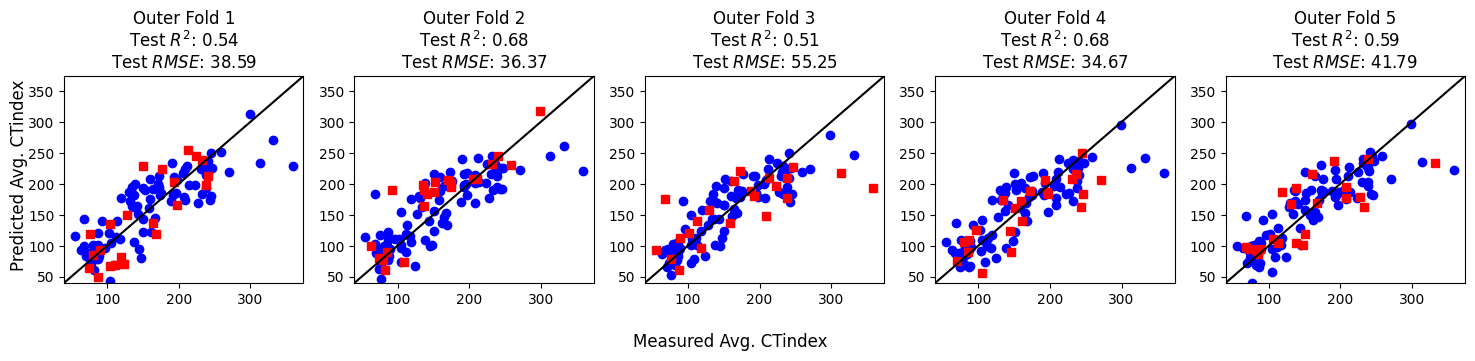


Nested CV R^2 scores: [0.539440422577464, 0.6755198909048261, 0.5086226521618362, 0.6757801538406323, 0.5864251288246038]
Nested CV RMSE: [38.591477751182616, 36.37392051748365, 55.24921391854087, 34.67467605742236, 41.79139872194543]
Average R^2: 0.597 ± 0.069
Average RMSE: 41.336 ± 7.353


In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.metrics import root_mean_squared_error

# Define the outer CV
outer_cv = KFold(n_splits=5, shuffle=True, random_state=40)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_components': [4, 8, 12, 16]
}

# Store the results
outer_results_R2 = []
outer_results_rmse = []
best_params_list = []

fig, axs = plt.subplots(1, 5, figsize=(15, 3.6)) 
fid = 0
for train_idx, test_idx in outer_cv.split(X_clean):
    X_train, X_test = X_clean.iloc[train_idx], X_clean.iloc[test_idx]
    y_train, y_test = y_clean.iloc[train_idx], y_clean.iloc[test_idx]
    
    # Define inner CV for hyperparameter tuning
    inner_cv = KFold(n_splits=3, shuffle=True, random_state=42)
    
    # Set up the GridSearchCV
    grid_search = GridSearchCV(
        estimator=PLSRegression(),
        param_grid=param_grid,
        cv=inner_cv,
        scoring='neg_mean_squared_error'
    )
    
    # Fit on train data (inner CV)
    grid_search.fit(X_train, y_train)
    
    # Best model from inner CV
    best_model = grid_search.best_estimator_
    
    # Evaluate on the outer test fold
    test_score = best_model.score(X_test, y_test)
    test_rmse = root_mean_squared_error(y_test, best_model.predict(X_test))
    # Note: .score() for regressors returns R^2
    print(f"Best params: {grid_search.best_params_}")
    print(f"Outer fold test R^2: {test_score:.3f}")
    print(f"Outer fold test RMSE: {test_rmse:.3f}")
    outer_results_R2.append(test_score)
    outer_results_rmse.append(test_rmse)
    # Store best parameters found in this fold
    best_params_list.append(grid_search.best_params_)

    axs[fid].plot(y_train, best_model.predict(X_train) ,'ob', label='Training')
    axs[fid].plot(y_test, best_model.predict(X_test),'sr', label='Validation')
    yrange = np.max(y_clean) - np.min(y_clean)
    axs[fid].set_xlim(np.min(y_clean) - 0.05 * yrange, np.max(y_clean) + 0.05 * yrange)
    axs[fid].set_ylim(np.min(y_clean) - 0.05 * yrange, np.max(y_clean) + 0.05 * yrange)
    axs[fid].plot([np.min(y_clean) - 0.05 * yrange, np.max(y_clean) + 0.05 * yrange],[np.min(y_clean) - 0.05 * yrange,np.max(y_clean) + 0.05 * yrange],'-k')
    axs[fid].set_title(f'Outer Fold {fid+1}'+ f"\nTest $R^2$: {test_score:.2f}"+ f"\nTest $RMSE$: {test_rmse:.2f}")
    fid = fid + 1
fig.supxlabel('Measured ' + target)
fig.supylabel('Predicted ' + target)
plt.tight_layout()
plt.show()

# Summarize outer CV results
print(f"\nNested CV R^2 scores: {outer_results_R2}")
print(f"Nested CV RMSE: {outer_results_rmse}")
print(f"Average R^2: {np.mean(outer_results_R2):.3f} ± {np.std(outer_results_R2):.3f}")
print(f"Average RMSE: {np.mean(outer_results_rmse):.3f} ± {np.std(outer_results_rmse):.3f}")

##### Construct the Final Model for Deployment Using the Optimized Hyperparameters

In [72]:
# obtain the best hyperparamter from the Nested CV

# Convert list of dicts to DataFrame for easier aggregation
df_params = pd.DataFrame(best_params_list)

final_params = {}

for param in df_params.columns:
    if pd.api.types.is_numeric_dtype(df_params[param]):
        # For numerical params, compute median or mean (median is more robust)
        # Exclude None or NaN when calculating
        valid_vals = df_params[param].dropna()
        # For params with None, convert None to np.nan automatically during DataFrame creation
        median_val = valid_vals.median()
        # If the param expects int, convert back to int
        if pd.api.types.is_integer_dtype(df_params[param]):
            median_val = int(round(median_val))
        final_params[param] = median_val
    else:
        # For categorical (string/object), use the mode (most frequent)
        mode_val = df_params[param].mode()
        final_params[param] = mode_val.iloc[0] if not mode_val.empty else None

print("Aggregated best hyperparameters for final model:")
print(final_params)


# Fit the model on the entire dataset
model_pls_ct = PLSRegression(**final_params)
model_pls_ct.fit(X_clean, y_clean)

'''
plt.figure()
plt.plot(y_clean, model_pls_ct.predict(X_clean) ,'ob', label='Fit')
plt.show()
'''

import pickle

# Define the filename for the pickled model
filename = 'model_pls_ct.pkl'

# Save the model to the .pkl file
with open(filename, 'wb') as file:
    pickle.dump(model_pls_ct, file)

print(f"Model saved to {filename}")

Aggregated best hyperparameters for final model:
{'n_components': 8}
Model saved to model_pls_ct.pkl


##### Model Interpretation via Feature Importance

In [73]:
def calculate_vip(model):
  """
  Calculates Variable Importance in Projection (VIP) scores for a PLS model.

  Args:
    model: Fitted PLSRegression model from scikit-learn.

  Returns:
    An array of VIP scores for each predictor variable.
  """
  t = model.x_scores_
  w = model.x_weights_
  q = model.y_loadings_
  p, h = w.shape
  vips = np.zeros((p,))
  s = np.diag(t.T @ t @ q.T @ q).reshape(h, -1)
  total_s = np.sum(s)
  for i in range(p):
      weight = np.array([(w[i,j] / np.linalg.norm(w[:,j]))**2 for j in range(h)])
      vips[i] = np.sqrt((p*(s.T @ weight)/total_s).item())
  return vips

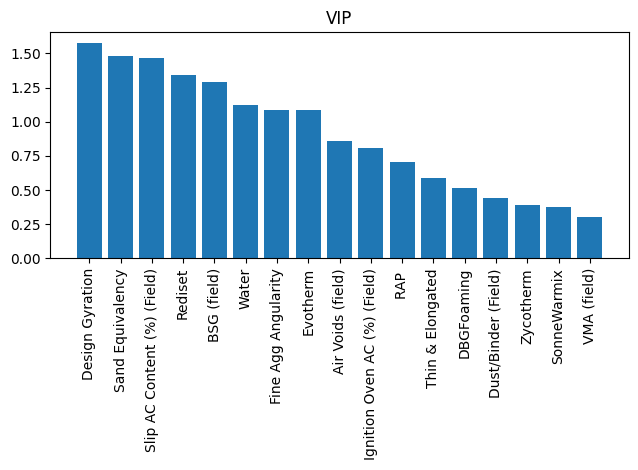

In [74]:
# Access feature importances
feature_importances = calculate_vip(model_pls_ct)
feature_names = X.columns
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure()
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align="center")
plt.xticks(range(len(feature_importances)), feature_names[sorted_indices],rotation = 90)
plt.title("VIP")
plt.tight_layout()
plt.show()

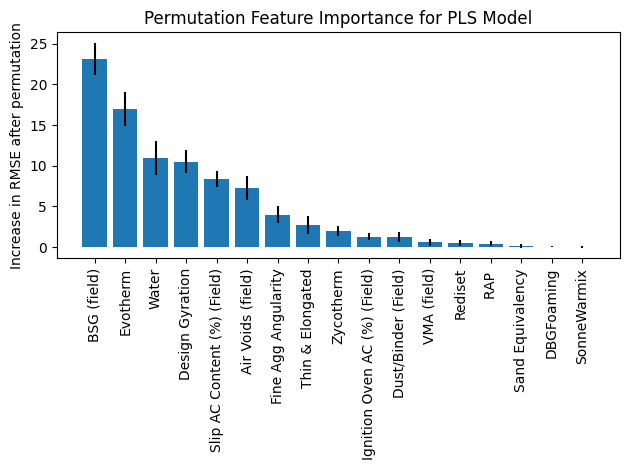

In [75]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    model_pls_ct, X_clean, y_clean,
    n_repeats=10, random_state=42, scoring='neg_root_mean_squared_error', n_jobs=-1
)

# Extract importance scores and feature names
importance_means = result.importances_mean
importance_std = result.importances_std
feature_names = X_clean.columns if hasattr(X_clean, 'columns') else [f'Feature {i}' for i in range(X_clean.shape[1])]

# Sort features by importance (descending)
sorted_idx = np.argsort(importance_means)[::-1]

plt.figure()
plt.bar(range(len(feature_names)), importance_means[sorted_idx], yerr=importance_std[sorted_idx], align='center')
plt.xticks(range(len(feature_names)), np.array(feature_names)[sorted_idx], rotation=90)
plt.ylabel('Increase in RMSE after permutation')
plt.title('Permutation Feature Importance for PLS Model')
plt.tight_layout()
plt.show()

#### 3.2.2 Random Forest Regression

##### Nested Cross-Validation for Hyperparamter Tuning and Model Evaluation

Best params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Outer fold test R^2: 0.704
Outer fold test RMSE: 30.916
Best params: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}
Outer fold test R^2: 0.652
Outer fold test RMSE: 37.644
Best params: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 1000}
Outer fold test R^2: 0.494
Outer fold test RMSE: 56.076
Best params: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
Outer fold test R^2: 0.637
Outer fold test RMSE: 36.712
Best params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Outer fold test R^2: 0.487
Outer fold test RMSE: 46.529


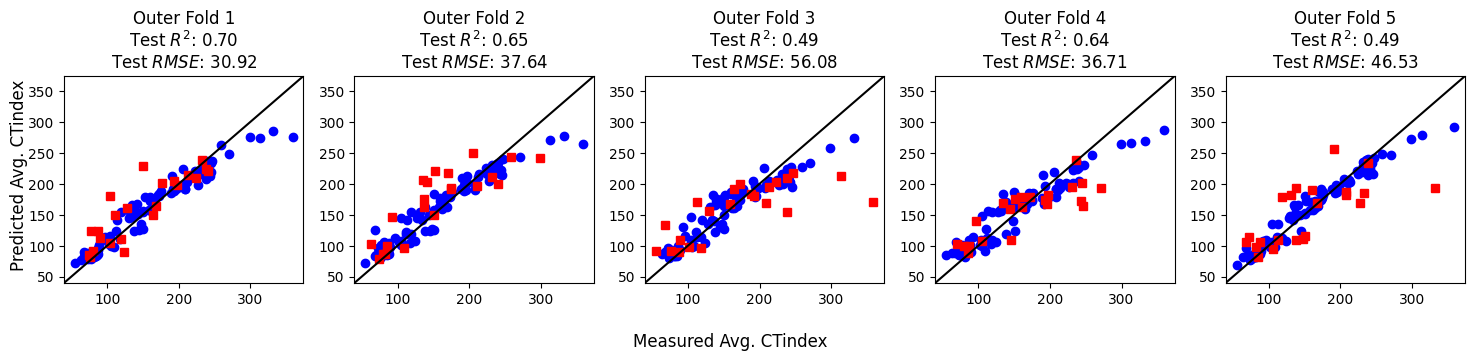


Nested CV R^2 scores: [0.7044271888477593, 0.6524609472253555, 0.49380453448562267, 0.6365666906242677, 0.4873514416605439]
Nested CV RMSE: [30.915817934652384, 37.64418337785812, 56.076082053033716, 36.71174086065971, 46.5285700278626]
Average R^2: 0.595 ± 0.088
Average RMSE: 41.575 ± 8.804


In [76]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.metrics import root_mean_squared_error

# Define the outer CV
outer_cv = KFold(n_splits=5, shuffle=True, random_state=40)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [3, 5, 10, 20],
    'min_samples_split': [2, 5, 10, 20]
}

# Store the results
outer_results_R2 = []
outer_results_rmse = []
best_params_list = []

fig, axs = plt.subplots(1, 5, figsize=(15, 3.6)) 
fid = 0
for train_idx, test_idx in outer_cv.split(X_clean):
    X_train, X_test = X_clean.iloc[train_idx], X_clean.iloc[test_idx]
    y_train, y_test = y_clean.iloc[train_idx], y_clean.iloc[test_idx]
    
    # Define inner CV for hyperparameter tuning
    inner_cv = KFold(n_splits=3, shuffle=True, random_state=42)
    
    # Set up the GridSearchCV
    grid_search = GridSearchCV(
        estimator=RandomForestRegressor(random_state=42),
        param_grid=param_grid,
        cv=inner_cv,
        scoring='neg_mean_squared_error'
    )
    
    # Fit on train data (inner CV)
    grid_search.fit(X_train, y_train)
    
    # Best model from inner CV
    best_model = grid_search.best_estimator_
    
    # Evaluate on the outer test fold
    test_score = best_model.score(X_test, y_test)
    test_rmse = root_mean_squared_error(y_test, best_model.predict(X_test))
    # Note: .score() for regressors returns R^2
    print(f"Best params: {grid_search.best_params_}")
    print(f"Outer fold test R^2: {test_score:.3f}")
    print(f"Outer fold test RMSE: {test_rmse:.3f}")
    outer_results_R2.append(test_score)
    outer_results_rmse.append(test_rmse)
    # Store best parameters found in this fold
    best_params_list.append(grid_search.best_params_)

    axs[fid].plot(y_train, best_model.predict(X_train) ,'ob', label='Training')
    axs[fid].plot(y_test, best_model.predict(X_test),'sr', label='Validation')
    yrange = np.max(y_clean) - np.min(y_clean)
    axs[fid].set_xlim(np.min(y_clean) - 0.05 * yrange, np.max(y_clean) + 0.05 * yrange)
    axs[fid].set_ylim(np.min(y_clean) - 0.05 * yrange, np.max(y_clean) + 0.05 * yrange)
    axs[fid].plot([np.min(y_clean) - 0.05 * yrange, np.max(y_clean) + 0.05 * yrange],[np.min(y_clean) - 0.05 * yrange,np.max(y_clean) + 0.05 * yrange],'-k')
    axs[fid].set_title(f'Outer Fold {fid+1}'+ f"\nTest $R^2$: {test_score:.2f}"+ f"\nTest $RMSE$: {test_rmse:.2f}")
    fid = fid + 1
fig.supxlabel('Measured ' + target)
fig.supylabel('Predicted ' + target)
plt.tight_layout()
plt.show()

# Summarize outer CV results
print(f"\nNested CV R^2 scores: {outer_results_R2}")
print(f"Nested CV RMSE: {outer_results_rmse}")
print(f"Average R^2: {np.mean(outer_results_R2):.3f} ± {np.std(outer_results_R2):.3f}")
print(f"Average RMSE: {np.mean(outer_results_rmse):.3f} ± {np.std(outer_results_rmse):.3f}")

##### Construct the Final Model for Deployment Using the Optimized Hyperparameters

In [77]:
# obtain the best hyperparamter from the Nested CV

# Convert list of dicts to DataFrame for easier aggregation
df_params = pd.DataFrame(best_params_list)

final_params = {}

for param in df_params.columns:
    if pd.api.types.is_numeric_dtype(df_params[param]):
        # For numerical params, compute median or mean (median is more robust)
        # Exclude None or NaN when calculating
        valid_vals = df_params[param].dropna()
        # For params with None, convert None to np.nan automatically during DataFrame creation
        median_val = valid_vals.median()
        # If the param expects int, convert back to int
        if pd.api.types.is_integer_dtype(df_params[param]):
            median_val = int(round(median_val))
        final_params[param] = median_val
    else:
        # For categorical (string/object), use the mode (most frequent)
        mode_val = df_params[param].mode()
        final_params[param] = mode_val.iloc[0] if not mode_val.empty else None

print("Aggregated best hyperparameters for final model:")
print(final_params)


# Fit the model on the entire dataset
model_rfr_ct = RandomForestRegressor(**final_params, random_state=42)
model_rfr_ct.fit(X_clean, y_clean)

'''
plt.figure()
plt.plot(y_clean, model_rfr_ct.predict(X_clean) ,'ob', label='Fit')
plt.show()
'''
import pickle

# Define the filename for the pickled model
filename = 'model_rfr_ct.pkl'

# Save the model to the .pkl file
with open(filename, 'wb') as file:
    pickle.dump(model_rfr_ct, file)

print(f"Model saved to {filename}")

Aggregated best hyperparameters for final model:
{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Model saved to model_rfr_ct.pkl


##### Model Interpretation via Feature Importance

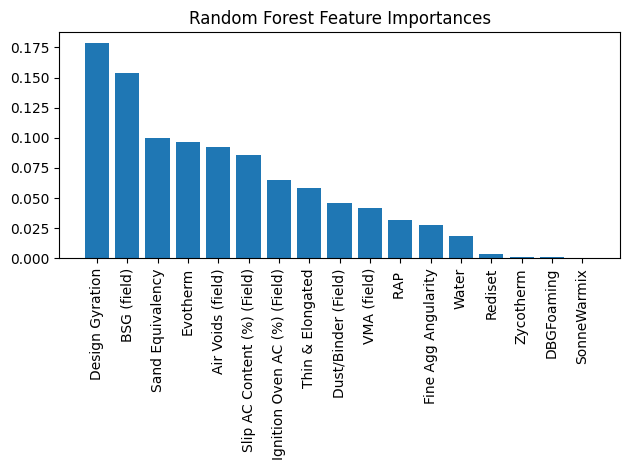

In [78]:
# Access feature importances
feature_importances = model_rfr_ct.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure()
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align="center")
plt.xticks(range(len(feature_importances)), feature_names[sorted_indices],rotation = 90)
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()

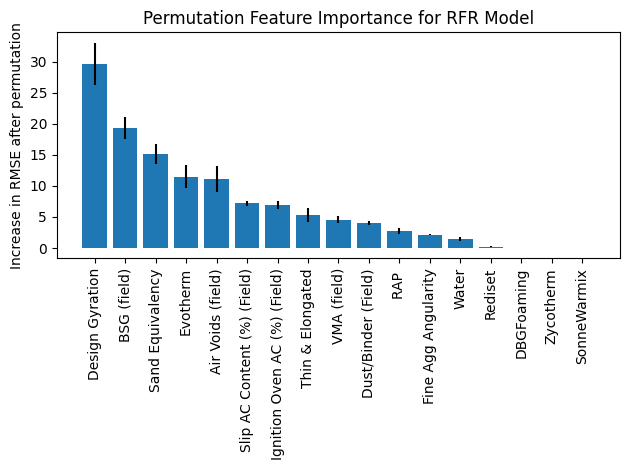

In [79]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    model_rfr_ct, X_clean, y_clean,
    n_repeats=10, random_state=42, scoring='neg_root_mean_squared_error', n_jobs=-1
)

# Extract importance scores and feature names
importance_means = result.importances_mean
importance_std = result.importances_std
feature_names = X_clean.columns if hasattr(X_clean, 'columns') else [f'Feature {i}' for i in range(X_clean.shape[1])]

# Sort features by importance (descending)
sorted_idx = np.argsort(importance_means)[::-1]

plt.figure()
plt.bar(range(len(feature_names)), importance_means[sorted_idx], yerr=importance_std[sorted_idx], align='center')
plt.xticks(range(len(feature_names)), np.array(feature_names)[sorted_idx], rotation=90)
plt.ylabel('Increase in RMSE after permutation')
plt.title('Permutation Feature Importance for RFR Model')
plt.tight_layout()
plt.show()

#### 3.2.3 Gaussian Process Regression

##### Nested Cross-Validation for Hyperparamter Tuning and Model Evaluation

In [80]:
from sklearn.exceptions import ConvergenceWarning
import warnings

warnings.filterwarnings("ignore", category=ConvergenceWarning)
# Restore the warning display
# warnings.filterwarnings("default", category=ConvergenceWarning)

Best params: {'gpr__alpha': 1e-05, 'gpr__kernel': 1.41**2 * RBF(length_scale=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) + WhiteKernel(noise_level=0.1)}
Outer fold test R^2: 0.413
Outer fold test RMSE: 43.557
Best params: {'gpr__alpha': 0.001, 'gpr__kernel': 1**2 * RBF(length_scale=[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]) + WhiteKernel(noise_level=0.05)}
Outer fold test R^2: 0.654
Outer fold test RMSE: 37.554
Best params: {'gpr__alpha': 0.001, 'gpr__kernel': 1.41**2 * RBF(length_scale=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) + WhiteKernel(noise_level=0.1)}
Outer fold test R^2: 0.663
Outer fold test RMSE: 45.753
Best params: {'gpr__alpha': 1e-05, 'gpr__kernel': 2.24**2 * RBF(length_scale=[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]) + WhiteKernel(noise_level=0.3)}
Outer fold test R^2: 0.521
Outer fold test RMSE: 42.129
Best params: {'gpr__alpha': 1e-05, 'gpr__kernel': 2.24**2 * RBF(length_scale=[2, 2, 2, 2, 2, 2, 

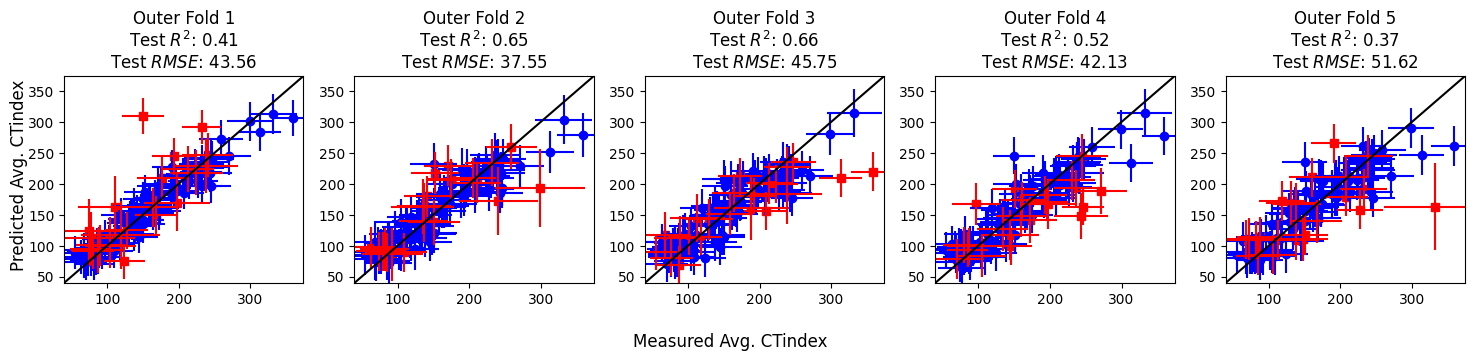


Nested CV R^2 scores: [0.413285372726663, 0.6541254117782183, 0.663021412118239, 0.5214000085034015, 0.36904834438686296]
Nested CV RMSE: [43.55740096085882, 37.553930772240555, 45.753012068118, 42.12878731209303, 51.6187968246384]
Average R^2: 0.524 ± 0.120
Average RMSE: 44.122 ± 4.611


In [81]:
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error


# Outer CV
outer_cv = KFold(n_splits=5, shuffle=True, random_state=40)

# Define a pipeline with scaler + GaussianProcessRegressor (GPR)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('gpr', GaussianProcessRegressor(random_state=42, normalize_y=True))
])

# Define kernel hyperparameter grid to tune
'''
param_grid = {
    'gpr__kernel': [
        C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2)) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1)),
        C(0.1, (1e-3, 1e3)) * RBF(length_scale=0.5, length_scale_bounds=(1e-2, 1e2)) + WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-10, 1e+1)),
        C(10.0, (1e-3, 1e3)) * RBF(length_scale=2.0, length_scale_bounds=(1e-2, 1e2)) + WhiteKernel(noise_level=0.5, noise_level_bounds=(1e-10, 1e+1))
    ],
    'gpr__alpha': [1e-10, 1e-5, 1e-3]  # noise level for numerical stability
}
'''

n_features = 17
param_grid = {
    'gpr__kernel': [
        C(2.0, (1e-3, 1e3)) * RBF(length_scale=np.ones(n_features), length_scale_bounds=(1e-2, 1e2)) + WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-3, 1e+0)),
        C(1.0, (1e-3, 1e3)) * RBF(length_scale=0.5 * np.ones(n_features), length_scale_bounds=(1e-2, 1e2)) + WhiteKernel(noise_level=0.05, noise_level_bounds=(1e-3, 1e+0)),
        C(5.0, (1e-3, 1e3)) * RBF(length_scale=2.0 * np.ones(n_features), length_scale_bounds=(1e-2, 1e2)) + WhiteKernel(noise_level=0.3, noise_level_bounds=(1e-3, 1e+0))
    ],
    'gpr__alpha': [1e-10, 1e-5, 1e-3]
}

# Store the results
outer_results_R2 = []
outer_results_rmse = []
best_params_list = []

fig, axs = plt.subplots(1, 5, figsize=(15, 3.6)) 
fid = 0
for fold, (train_idx, test_idx) in enumerate(outer_cv.split(X_clean), 1):
    X_train, X_test = X_clean.iloc[train_idx], X_clean.iloc[test_idx]
    y_train, y_test = y_clean.iloc[train_idx], y_clean.iloc[test_idx]
    
    # Inner CV for hyperparameter tuning
    inner_cv = KFold(n_splits=3, shuffle=True, random_state=42)
    
    grid_search = GridSearchCV(
        estimator=pipe,
        param_grid=param_grid,
        cv=inner_cv,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_

    # Evaluate on the outer test fold
    test_score = best_model.score(X_test, y_test)
    test_rmse = root_mean_squared_error(y_test, best_model.predict(X_test))
    # Note: .score() for regressors returns R^2
    print(f"Best params: {grid_search.best_params_}")
    print(f"Outer fold test R^2: {test_score:.3f}")
    print(f"Outer fold test RMSE: {test_rmse:.3f}")
    outer_results_R2.append(test_score)
    outer_results_rmse.append(test_rmse)
    # Store best parameters found in this fold
    best_params_list.append(grid_search.best_params_)


    axs[fid].plot(y_train, best_model.predict(X_train) ,'ob', label='Training')
    axs[fid].plot(y_test, best_model.predict(X_test),'sr', label='Validation')

    axs[fid].errorbar(y_train, best_model.predict(X_train), yerr = best_model.predict(X_train, return_std = True)[1], xerr = best_model.predict(X_train, return_std = True)[1], fmt='none', ecolor='blue', label='Training')
    axs[fid].errorbar(y_test, best_model.predict(X_test), yerr = best_model.predict(X_test, return_std = True)[1], xerr = best_model.predict(X_test, return_std = True)[1], fmt='none', ecolor='red', label='Validation')

    yrange = np.max(y_clean) - np.min(y_clean)
    axs[fid].set_xlim(np.min(y_clean) - 0.05 * yrange, np.max(y_clean) + 0.05 * yrange)
    axs[fid].set_ylim(np.min(y_clean) - 0.05 * yrange, np.max(y_clean) + 0.05 * yrange)
    axs[fid].plot([np.min(y_clean) - 0.05 * yrange, np.max(y_clean) + 0.05 * yrange],[np.min(y_clean) - 0.05 * yrange,np.max(y_clean) + 0.05 * yrange],'-k')
    axs[fid].set_title(f'Outer Fold {fid+1}'+ f"\nTest $R^2$: {test_score:.2f}"+ f"\nTest $RMSE$: {test_rmse:.2f}")
    fid = fid + 1
fig.supxlabel('Measured ' + target)
fig.supylabel('Predicted ' + target)
plt.tight_layout()
plt.show()

# Summarize outer CV results
print(f"\nNested CV R^2 scores: {outer_results_R2}")
print(f"Nested CV RMSE: {outer_results_rmse}")
print(f"Average R^2: {np.mean(outer_results_R2):.3f} ± {np.std(outer_results_R2):.3f}")
print(f"Average RMSE: {np.mean(outer_results_rmse):.3f} ± {np.std(outer_results_rmse):.3f}")

##### Construct the Final Model for Deployment Using the Optimized Hyperparameters

In [82]:
# obtain the best hyperparamter from the Nested CV

# Convert list of dicts to DataFrame for easier aggregation
df_params = pd.DataFrame(best_params_list)

final_params = {}

for param in df_params.columns:
    if pd.api.types.is_numeric_dtype(df_params[param]):
        # For numerical parameters, compute median (more robust than mean)
        valid_vals = df_params[param].dropna()
        median_val = valid_vals.median()
        # Convert to int if dtype is integer-like
        if pd.api.types.is_integer_dtype(df_params[param]):
            median_val = int(round(median_val))
        final_params[param] = median_val

    else:
        # For categorical or object dtype parameters (including custom kernel objects),
        # get the most frequent value without sorting to avoid comparison errors
        counts = df_params[param].value_counts(dropna=True)
        if not counts.empty:
            final_params[param] = counts.idxmax()
        else:
            final_params[param] = None

print("Aggregated best hyperparameters for final model:")
print(final_params)


# Fit the model on the entire dataset
import copy
model_gpr_ct = copy.deepcopy(pipe)
model_gpr_ct.set_params(**final_params)
model_gpr_ct.fit(X_clean, y_clean)

'''
plt.figure()
plt.plot(y_clean, model_gpr_ct.predict(X_clean) ,'ob', label='Fit')
plt.errorbar(y_clean, model_gpr_ct.predict(X_clean), yerr = model_gpr_ct.predict(X_clean, return_std = True)[1], xerr = model_gpr_ct.predict(X_clean, return_std = True)[1], fmt='none', ecolor='blue', label='Training')
plt.show()
'''

import pickle

# Define the filename for the pickled model
filename = 'model_gpr_ct.pkl'

# Save the model to the .pkl file
with open(filename, 'wb') as file:
    pickle.dump(model_gpr_ct, file)

print(f"Model saved to {filename}")

Aggregated best hyperparameters for final model:
{'gpr__alpha': np.float64(1e-05), 'gpr__kernel': 1.41**2 * RBF(length_scale=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) + WhiteKernel(noise_level=0.1)}
Model saved to model_gpr_ct.pkl


##### Model Interpretation via Feature Importance

Feature length-scales: [ 17.43174486   5.30023023   1.91840056   8.82268148 100.
   2.85951466   4.96618633 100.          14.17080366 100.
  22.10661471   0.93340009 100.           2.95674688   1.
   1.0000874    1.        ]


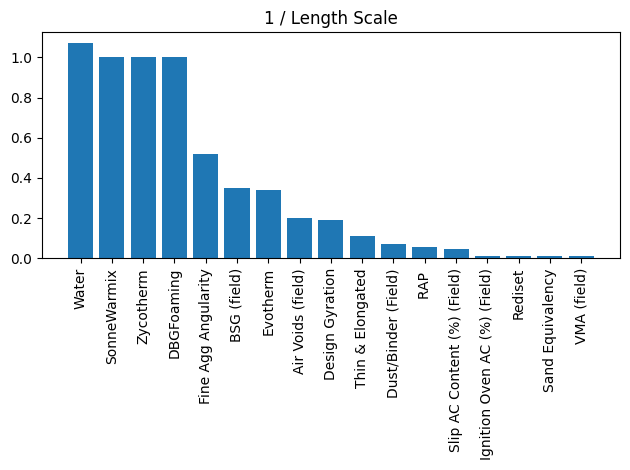

In [83]:
# After fitting GPR model
kernel = model_gpr_ct.named_steps['gpr'].kernel_

# If using a kernel combination like ConstantKernel * RBF + WhiteKernel,
# get the RBF kernel length scales like this:


print("Feature length-scales:", kernel.k1.k2.length_scale)

# Access feature importances
feature_importances = 1 / kernel.k1.k2.length_scale
feature_names = X.columns
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure()
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align="center")
plt.xticks(range(len(feature_importances)), feature_names[sorted_indices],rotation = 90)
plt.title("1 / Length Scale")
plt.tight_layout()
plt.show()
plt.show()

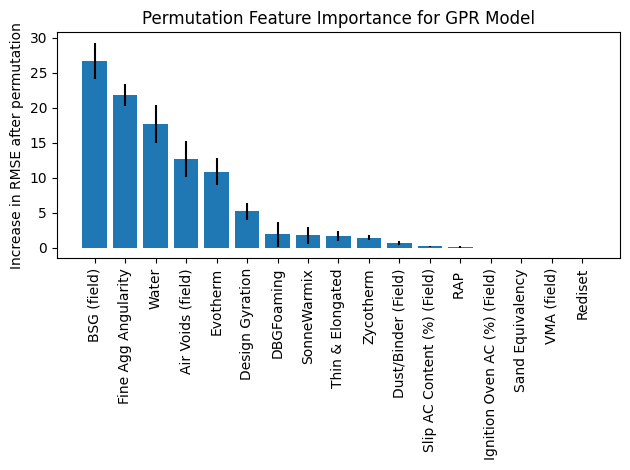

In [84]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    model_gpr_ct, X_clean, y_clean,
    n_repeats=10, random_state=42, scoring='neg_root_mean_squared_error', n_jobs=-1
)

# Extract importance scores and feature names
importance_means = result.importances_mean
importance_std = result.importances_std
feature_names = X_clean.columns if hasattr(X_clean, 'columns') else [f'Feature {i}' for i in range(X_clean.shape[1])]

# Sort features by importance (descending)
sorted_idx = np.argsort(importance_means)[::-1]

plt.figure()
plt.bar(range(len(feature_names)), importance_means[sorted_idx], yerr=importance_std[sorted_idx], align='center')
plt.xticks(range(len(feature_names)), np.array(feature_names)[sorted_idx], rotation=90)
plt.ylabel('Increase in RMSE after permutation')
plt.title('Permutation Feature Importance for GPR Model')
plt.tight_layout()
plt.show()

### 3.3 Model for HWTT Rut Depth

Data Cleaning and Imputation

Remove samples with missing target variable.

Data impulation by mean value is used to fill the missing data in input matrix X, e.g., for features 'Fine Agg Angularity', 'Thin & Elongated', and 'Sand Equivalency'

In [85]:
target = "Avg. Rut Depth"
ifimpulation = True

y = data_IVS[target]

# drop the data if the target value y is missing.
X_clean = X[y.notnull()]
y_clean = y.dropna()

# The input features 'Fine Agg Angularity', 'Thin & Elongated', and 'Sand Equivalency' are missing for samples from 2020.
# Data impulation by mean value is used to fill these missing data.
# There are a few missing data for other input features. 
# Since the number of this cases are small, these samples are deleted, without being considered in the model
if ifimpulation:
    X_clean = X_clean.copy()
    X_clean['Fine Agg Angularity'] = X_clean['Fine Agg Angularity'].fillna(X_clean['Fine Agg Angularity'].mean())
    X_clean['Thin & Elongated'] = X_clean['Thin & Elongated'].fillna(X_clean['Thin & Elongated'].mean())
    X_clean['Sand Equivalency'] = X_clean['Sand Equivalency'].fillna(X_clean['Sand Equivalency'].mean())
    
    y_clean = y_clean[X_clean.notnull().all(axis=1)]
    X_clean = X_clean.dropna()

# display(X_clean)

Check the multicolinearity of the input data

In [86]:
X_clean.corr()

,RAP,Design Gyration,Fine Agg Angularity,Thin & Elongated,Sand Equivalency,BSG (field),Air Voids (field),VMA (field),Dust/Binder (Field),Ignition Oven AC (%) (Field),Slip AC Content (%) (Field),Water,Rediset,Evotherm,SonneWarmix,DBGFoaming,Zycotherm
RAP,1.000000,0.122990,-0.137302,-0.373049,0.059415,0.196876,0.134903,0.092239,-0.040440,-0.120352,-0.158008,0.167793,0.177168,-0.708458,0.045400,0.045400,-0.287487
Design Gyration,0.122990,1.000000,0.144122,-0.453976,-0.183365,-0.064062,0.085119,-0.234998,-0.093473,-0.464004,-0.614647,-0.105211,0.090577,-0.155589,-0.033037,0.149768,0.048921
Fine Agg Angularity,-0.137302,0.144122,1.000000,0.102623,-0.720165,-0.282799,0.015503,-0.164605,-0.009506,-0.029985,0.166205,-0.036630,0.244677,0.126226,-0.066073,-0.066073,-0.115864
Thin & Elongated,-0.373049,-0.453976,0.102623,1.000000,0.311063,-0.012115,0.141002,0.317378,-0.007990,0.403690,0.486725,0.032072,-0.332132,0.233643,-0.161276,-0.143428,0.210984
Sand Equivalency,0.059415,-0.183365,-0.720165,0.311063,1.000000,0.447202,-0.085785,0.165153,-0.090612,0.139700,-0.110598,0.076964,-0.606503,0.014351,0.071977,0.037099,-0.077658
BSG (field),0.196876,-0.064062,-0.282799,-0.012115,0.447202,1.000000,-0.426525,-0.203525,-0.396840,0.214570,-0.268281,0.436801,-0.561553,-0.167663,0.129229,0.105980,-0.218128
Air Voids (field),0.134903,0.085119,0.015503,0.141002,-0.085785,-0.426525,1.000000,0.631754,-0.100984,-0.044462,0.039763,-0.012027,0.146616,0.068744,-0.110045,0.000667,0.184525
VMA (field),0.092239,-0.234998,-0.164605,0.317378,0.165153,-0.203525,0.631754,1.000000,-0.401851,0.421470,0.337594,-0.231937,-0.158303,0.030422,-0.073149,0.020981,0.100982
Dust/Binder (Field),-0.040440,-0.093473,-0.009506,-0.007990,-0.090612,-0.396840,-0.100984,-0.401851,1.000000,-0.233486,0.194453,-0.142846,0.385141,-0.034311,0.020394,-0.116851,0.129355
Ignition Oven AC (%) (Field),-0.120352,-0.464004,-0.029985,0.403690,0.139700,0.214570,-0.044462,0.421470,-0.233486,1.000000,0.553644,-0.070487,-0.255228,0.113913,0.084574,0.120814,-0.055050


#### 3.3.1 Partial Least Square Regression

##### Nested Cross-Validation for Hyperparamter Tuning and Model Evaluation

Best params: {'n_components': 4}
Outer fold test R^2: 0.486
Outer fold test RMSE: 0.691
Best params: {'n_components': 4}
Outer fold test R^2: 0.585
Outer fold test RMSE: 0.615
Best params: {'n_components': 8}
Outer fold test R^2: 0.139
Outer fold test RMSE: 0.580
Best params: {'n_components': 4}
Outer fold test R^2: 0.409
Outer fold test RMSE: 0.566
Best params: {'n_components': 4}
Outer fold test R^2: 0.338
Outer fold test RMSE: 0.699


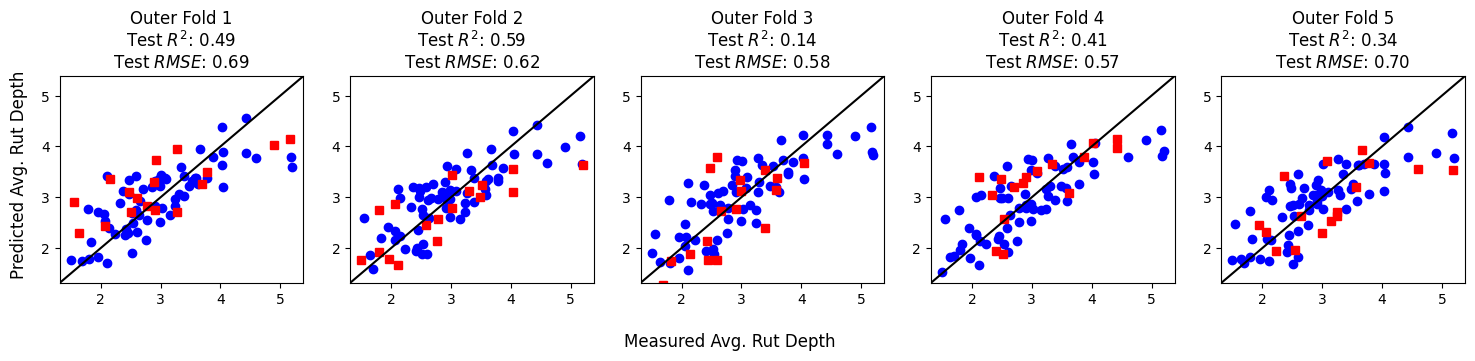


Nested CV R^2 scores: [0.48590845353477174, 0.5850991704791413, 0.13873704685666632, 0.40939473946686333, 0.33817240342029165]
Nested CV RMSE: [0.6906505277399372, 0.6152943206312109, 0.5800031441426807, 0.5660711751936602, 0.6988441893562246]
Average R^2: 0.391 ± 0.151
Average RMSE: 0.630 ± 0.055


In [87]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.metrics import root_mean_squared_error

# Define the outer CV
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_components': [4, 8, 12, 16]
}

# Store the results
outer_results_R2 = []
outer_results_rmse = []
best_params_list = []

fig, axs = plt.subplots(1, 5, figsize=(15, 3.6)) 
fid = 0
for train_idx, test_idx in outer_cv.split(X_clean):
    X_train, X_test = X_clean.iloc[train_idx], X_clean.iloc[test_idx]
    y_train, y_test = y_clean.iloc[train_idx], y_clean.iloc[test_idx]
    
    # Define inner CV for hyperparameter tuning
    inner_cv = KFold(n_splits=3, shuffle=True, random_state=42)
    
    # Set up the GridSearchCV
    grid_search = GridSearchCV(
        estimator=PLSRegression(),
        param_grid=param_grid,
        cv=inner_cv,
        scoring='neg_mean_squared_error'
    )
    
    # Fit on train data (inner CV)
    grid_search.fit(X_train, y_train)
    
    # Best model from inner CV
    best_model = grid_search.best_estimator_
    
    # Evaluate on the outer test fold
    test_score = best_model.score(X_test, y_test)
    test_rmse = root_mean_squared_error(y_test, best_model.predict(X_test))
    # Note: .score() for regressors returns R^2
    print(f"Best params: {grid_search.best_params_}")
    print(f"Outer fold test R^2: {test_score:.3f}")
    print(f"Outer fold test RMSE: {test_rmse:.3f}")
    outer_results_R2.append(test_score)
    outer_results_rmse.append(test_rmse)
    # Store best parameters found in this fold
    best_params_list.append(grid_search.best_params_)

    axs[fid].plot(y_train, best_model.predict(X_train) ,'ob', label='Training')
    axs[fid].plot(y_test, best_model.predict(X_test),'sr', label='Validation')
    yrange = np.max(y_clean) - np.min(y_clean)
    axs[fid].set_xlim(np.min(y_clean) - 0.05 * yrange, np.max(y_clean) + 0.05 * yrange)
    axs[fid].set_ylim(np.min(y_clean) - 0.05 * yrange, np.max(y_clean) + 0.05 * yrange)
    axs[fid].plot([np.min(y_clean) - 0.05 * yrange, np.max(y_clean) + 0.05 * yrange],[np.min(y_clean) - 0.05 * yrange,np.max(y_clean) + 0.05 * yrange],'-k')
    axs[fid].set_title(f'Outer Fold {fid+1}'+ f"\nTest $R^2$: {test_score:.2f}"+ f"\nTest $RMSE$: {test_rmse:.2f}")
    fid = fid + 1
fig.supxlabel('Measured ' + target)
fig.supylabel('Predicted ' + target)
plt.tight_layout()
plt.show()

# Summarize outer CV results
print(f"\nNested CV R^2 scores: {outer_results_R2}")
print(f"Nested CV RMSE: {outer_results_rmse}")
print(f"Average R^2: {np.mean(outer_results_R2):.3f} ± {np.std(outer_results_R2):.3f}")
print(f"Average RMSE: {np.mean(outer_results_rmse):.3f} ± {np.std(outer_results_rmse):.3f}")

##### Construct the Final Model for Deployment Using the Optimized Hyperparameters

In [88]:
# obtain the best hyperparamter from the Nested CV

# Convert list of dicts to DataFrame for easier aggregation
df_params = pd.DataFrame(best_params_list)

final_params = {}

for param in df_params.columns:
    if pd.api.types.is_numeric_dtype(df_params[param]):
        # For numerical params, compute median or mean (median is more robust)
        # Exclude None or NaN when calculating
        valid_vals = df_params[param].dropna()
        # For params with None, convert None to np.nan automatically during DataFrame creation
        median_val = valid_vals.median()
        # If the param expects int, convert back to int
        if pd.api.types.is_integer_dtype(df_params[param]):
            median_val = int(round(median_val))
        final_params[param] = median_val
    else:
        # For categorical (string/object), use the mode (most frequent)
        mode_val = df_params[param].mode()
        final_params[param] = mode_val.iloc[0] if not mode_val.empty else None

print("Aggregated best hyperparameters for final model:")
print(final_params)


# Fit the model on the entire dataset
model_pls_rt = PLSRegression(**final_params)
model_pls_rt.fit(X_clean, y_clean)
'''
plt.figure()
plt.plot(y_clean, model_pls_rt.predict(X_clean) ,'ob', label='Fit')
plt.show()
'''

import pickle

# Define the filename for the pickled model
filename = 'model_pls_rt.pkl'

# Save the model to the .pkl file
with open(filename, 'wb') as file:
    pickle.dump(model_pls_rt, file)

print(f"Model saved to {filename}")

Aggregated best hyperparameters for final model:
{'n_components': 4}
Model saved to model_pls_rt.pkl


##### Model Interpretation via Feature Importance

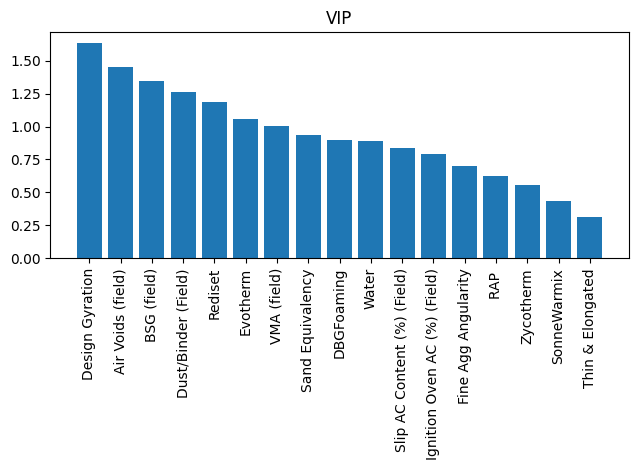

In [89]:
# Access feature importances
feature_importances = calculate_vip(model_pls_rt)
feature_names = X.columns
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure()
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align="center")
plt.xticks(range(len(feature_importances)), feature_names[sorted_indices],rotation = 90)
plt.title("VIP")
plt.tight_layout()
plt.show()

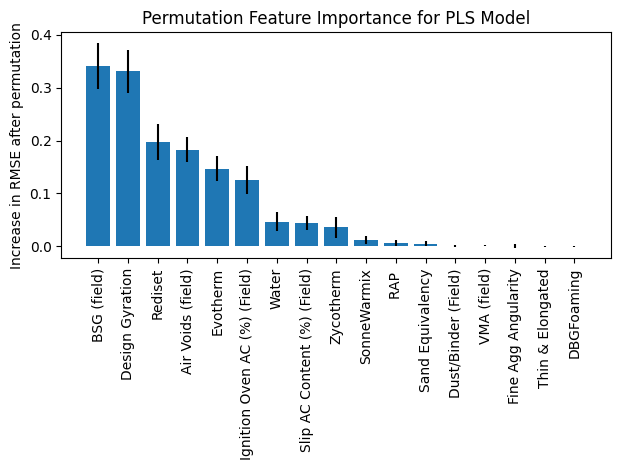

In [90]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    model_pls_rt, X_clean, y_clean,
    n_repeats=10, random_state=42, scoring='neg_root_mean_squared_error', n_jobs=-1
)

# Extract importance scores and feature names
importance_means = result.importances_mean
importance_std = result.importances_std
feature_names = X_clean.columns if hasattr(X_clean, 'columns') else [f'Feature {i}' for i in range(X_clean.shape[1])]

# Sort features by importance (descending)
sorted_idx = np.argsort(importance_means)[::-1]

plt.figure()
plt.bar(range(len(feature_names)), importance_means[sorted_idx], yerr=importance_std[sorted_idx], align='center')
plt.xticks(range(len(feature_names)), np.array(feature_names)[sorted_idx], rotation=90)
plt.ylabel('Increase in RMSE after permutation')
plt.title('Permutation Feature Importance for PLS Model')
plt.tight_layout()
plt.show()

#### 3.3.2 Random Forest Regression

##### Nested Cross-Validation for Hyperparamter Tuning and Model Evaluation

Best params: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
Outer fold test R^2: 0.486
Outer fold test RMSE: 0.691
Best params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Outer fold test R^2: 0.390
Outer fold test RMSE: 0.746
Best params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Outer fold test R^2: 0.040
Outer fold test RMSE: 0.612
Best params: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 1000}
Outer fold test R^2: 0.374
Outer fold test RMSE: 0.583
Best params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 500}
Outer fold test R^2: 0.377
Outer fold test RMSE: 0.678


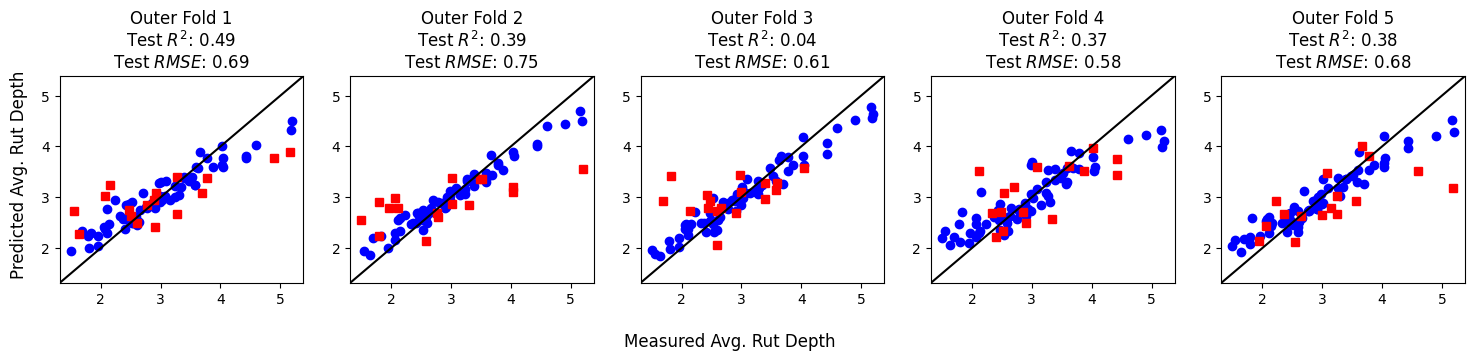


Nested CV R^2 scores: [0.4857178641764027, 0.3903952109138712, 0.039918950415714916, 0.3741425191050608, 0.3770442133677909]
Nested CV RMSE: [0.6907785384456524, 0.7458215707949746, 0.6123735347123394, 0.5827202483772165, 0.6780106794798393]
Average R^2: 0.333 ± 0.152
Average RMSE: 0.662 ± 0.058


In [91]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.metrics import root_mean_squared_error

# Define the outer CV
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [3, 5, 10, 20],
    'min_samples_split': [2, 5, 10, 20]
}

# Store the results
outer_results_R2 = []
outer_results_rmse = []
best_params_list = []

fig, axs = plt.subplots(1, 5, figsize=(15, 3.6)) 
fid = 0
for train_idx, test_idx in outer_cv.split(X_clean):
    X_train, X_test = X_clean.iloc[train_idx], X_clean.iloc[test_idx]
    y_train, y_test = y_clean.iloc[train_idx], y_clean.iloc[test_idx]
    
    # Define inner CV for hyperparameter tuning
    inner_cv = KFold(n_splits=3, shuffle=True, random_state=42)
    
    # Set up the GridSearchCV
    grid_search = GridSearchCV(
        estimator=RandomForestRegressor(random_state=42),
        param_grid=param_grid,
        cv=inner_cv,
        scoring='neg_mean_squared_error'
    )
    
    # Fit on train data (inner CV)
    grid_search.fit(X_train, y_train)
    
    # Best model from inner CV
    best_model = grid_search.best_estimator_
    
    # Evaluate on the outer test fold
    test_score = best_model.score(X_test, y_test)
    test_rmse = root_mean_squared_error(y_test, best_model.predict(X_test))
    # Note: .score() for regressors returns R^2
    print(f"Best params: {grid_search.best_params_}")
    print(f"Outer fold test R^2: {test_score:.3f}")
    print(f"Outer fold test RMSE: {test_rmse:.3f}")
    outer_results_R2.append(test_score)
    outer_results_rmse.append(test_rmse)
    # Store best parameters found in this fold
    best_params_list.append(grid_search.best_params_)

    axs[fid].plot(y_train, best_model.predict(X_train) ,'ob', label='Training')
    axs[fid].plot(y_test, best_model.predict(X_test),'sr', label='Validation')
    yrange = np.max(y_clean) - np.min(y_clean)
    axs[fid].set_xlim(np.min(y_clean) - 0.05 * yrange, np.max(y_clean) + 0.05 * yrange)
    axs[fid].set_ylim(np.min(y_clean) - 0.05 * yrange, np.max(y_clean) + 0.05 * yrange)
    axs[fid].plot([np.min(y_clean) - 0.05 * yrange, np.max(y_clean) + 0.05 * yrange],[np.min(y_clean) - 0.05 * yrange,np.max(y_clean) + 0.05 * yrange],'-k')
    axs[fid].set_title(f'Outer Fold {fid+1}'+ f"\nTest $R^2$: {test_score:.2f}"+ f"\nTest $RMSE$: {test_rmse:.2f}")
    fid = fid + 1
fig.supxlabel('Measured ' + target)
fig.supylabel('Predicted ' + target)
plt.tight_layout()
plt.show()

# Summarize outer CV results
print(f"\nNested CV R^2 scores: {outer_results_R2}")
print(f"Nested CV RMSE: {outer_results_rmse}")
print(f"Average R^2: {np.mean(outer_results_R2):.3f} ± {np.std(outer_results_R2):.3f}")
print(f"Average RMSE: {np.mean(outer_results_rmse):.3f} ± {np.std(outer_results_rmse):.3f}")

##### Construct the Final Model for Deployment Using the Optimized Hyperparameters

In [92]:
# obtain the best hyperparamter from the Nested CV

# Convert list of dicts to DataFrame for easier aggregation
df_params = pd.DataFrame(best_params_list)

final_params = {}

for param in df_params.columns:
    if pd.api.types.is_numeric_dtype(df_params[param]):
        # For numerical params, compute median or mean (median is more robust)
        # Exclude None or NaN when calculating
        valid_vals = df_params[param].dropna()
        # For params with None, convert None to np.nan automatically during DataFrame creation
        median_val = valid_vals.median()
        # If the param expects int, convert back to int
        if pd.api.types.is_integer_dtype(df_params[param]):
            median_val = int(round(median_val))
        final_params[param] = median_val
    else:
        # For categorical (string/object), use the mode (most frequent)
        mode_val = df_params[param].mode()
        final_params[param] = mode_val.iloc[0] if not mode_val.empty else None

print("Aggregated best hyperparameters for final model:")
print(final_params)


# Fit the model on the entire dataset
model_rfr_rt = RandomForestRegressor(**final_params, random_state=42)
model_rfr_rt.fit(X_clean, y_clean)

'''
plt.figure()
plt.plot(y_clean, model_rfr_rt.predict(X_clean) ,'ob', label='Fit')
plt.show()
'''

import pickle

# Define the filename for the pickled model
filename = 'model_rfr_rt.pkl'

# Save the model to the .pkl file
with open(filename, 'wb') as file:
    pickle.dump(model_rfr_rt, file)

print(f"Model saved to {filename}")

Aggregated best hyperparameters for final model:
{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Model saved to model_rfr_rt.pkl


##### Model Interpretation via Feature Importance

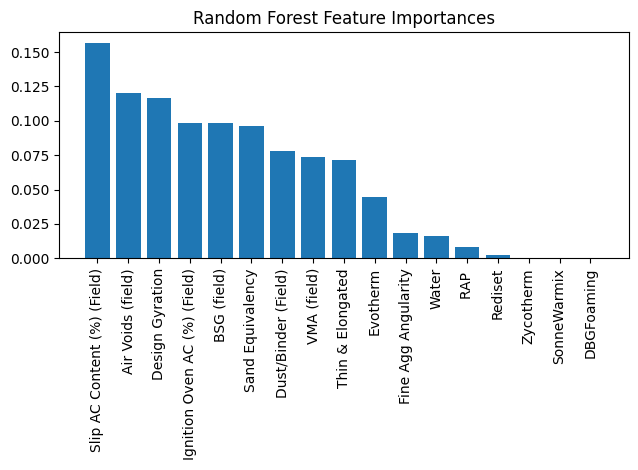

In [93]:
# Access feature importances
feature_importances = model_rfr_rt.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure()
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align="center")
plt.xticks(range(len(feature_importances)), feature_names[sorted_indices],rotation = 90)
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()

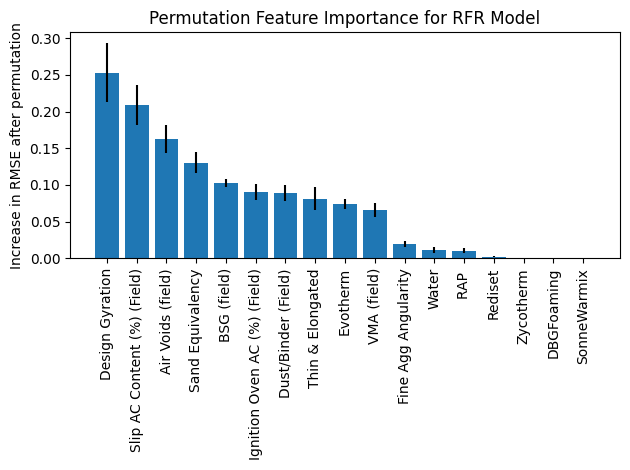

In [94]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    model_rfr_rt, X_clean, y_clean,
    n_repeats=10, random_state=42, scoring='neg_root_mean_squared_error', n_jobs=-1
)

# Extract importance scores and feature names
importance_means = result.importances_mean
importance_std = result.importances_std
feature_names = X_clean.columns if hasattr(X_clean, 'columns') else [f'Feature {i}' for i in range(X_clean.shape[1])]

# Sort features by importance (descending)
sorted_idx = np.argsort(importance_means)[::-1]

plt.figure()
plt.bar(range(len(feature_names)), importance_means[sorted_idx], yerr=importance_std[sorted_idx], align='center')
plt.xticks(range(len(feature_names)), np.array(feature_names)[sorted_idx], rotation=90)
plt.ylabel('Increase in RMSE after permutation')
plt.title('Permutation Feature Importance for RFR Model')
plt.tight_layout()
plt.show()

#### 3.3.3 Gaussian Process Regression

##### Nested Cross-Validation for Hyperparamter Tuning and Model Evaluation

Best params: {'gpr__alpha': 1e-05, 'gpr__kernel': 1**2 * RBF(length_scale=[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]) + WhiteKernel(noise_level=0.05)}
Outer fold test R^2: 0.633
Outer fold test RMSE: 0.583
Best params: {'gpr__alpha': 1e-05, 'gpr__kernel': 2.24**2 * RBF(length_scale=[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]) + WhiteKernel(noise_level=0.3)}
Outer fold test R^2: 0.283
Outer fold test RMSE: 0.809
Best params: {'gpr__alpha': 1e-10, 'gpr__kernel': 1.41**2 * RBF(length_scale=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) + WhiteKernel(noise_level=0.1)}
Outer fold test R^2: 0.200
Outer fold test RMSE: 0.559
Best params: {'gpr__alpha': 1e-10, 'gpr__kernel': 2.24**2 * RBF(length_scale=[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]) + WhiteKernel(noise_level=0.3)}
Outer fold test R^2: -0.045
Outer fold test RMSE: 0.753
Best params: {'gpr__alpha': 0.001, 'gpr__kernel': 1**2 * RBF(length_scale=[0.5, 0.5, 0.5, 0.5, 0.5,

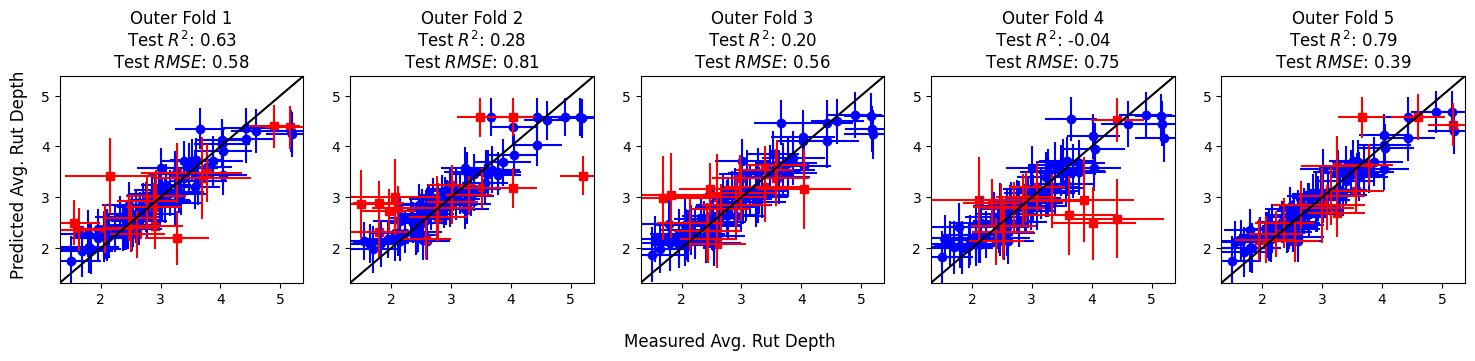


Nested CV R^2 scores: [0.6333909123450094, 0.2832860462631259, 0.19973035912462178, -0.04480337796354861, 0.791730153963056]
Nested CV RMSE: [0.5832298319396093, 0.8086930016571522, 0.559088598021482, 0.7529041125769174, 0.39203164092263965]
Average R^2: 0.373 ± 0.302
Average RMSE: 0.619 ± 0.149


In [95]:
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error


# Outer CV
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Define a pipeline with scaler + GaussianProcessRegressor (GPR)
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('gpr', GaussianProcessRegressor(random_state=42, normalize_y=True))
])

# Define kernel hyperparameter grid to tune
'''
param_grid = {
    'gpr__kernel': [
        C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2)) + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1)),
        C(0.1, (1e-3, 1e3)) * RBF(length_scale=0.5, length_scale_bounds=(1e-2, 1e2)) + WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-10, 1e+1)),
        C(10.0, (1e-3, 1e3)) * RBF(length_scale=2.0, length_scale_bounds=(1e-2, 1e2)) + WhiteKernel(noise_level=0.5, noise_level_bounds=(1e-10, 1e+1))
    ],
    'gpr__alpha': [1e-10, 1e-5, 1e-3]  # noise level for numerical stability
}
'''

n_features = 17
param_grid = {
    'gpr__kernel': [
        C(2.0, (1e-3, 1e3)) * RBF(length_scale=np.ones(n_features), length_scale_bounds=(1e-2, 1e2)) + WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-3, 1e+0)),
        C(1.0, (1e-3, 1e3)) * RBF(length_scale=0.5 * np.ones(n_features), length_scale_bounds=(1e-2, 1e2)) + WhiteKernel(noise_level=0.05, noise_level_bounds=(1e-3, 1e+0)),
        C(5.0, (1e-3, 1e3)) * RBF(length_scale=2.0 * np.ones(n_features), length_scale_bounds=(1e-2, 1e2)) + WhiteKernel(noise_level=0.3, noise_level_bounds=(1e-3, 1e+0))
    ],
    'gpr__alpha': [1e-10, 1e-5, 1e-3]
}

# Store the results
outer_results_R2 = []
outer_results_rmse = []
best_params_list = []

fig, axs = plt.subplots(1, 5, figsize=(15, 3.6)) 
fid = 0
for fold, (train_idx, test_idx) in enumerate(outer_cv.split(X_clean), 1):
    X_train, X_test = X_clean.iloc[train_idx], X_clean.iloc[test_idx]
    y_train, y_test = y_clean.iloc[train_idx], y_clean.iloc[test_idx]
    
    # Inner CV for hyperparameter tuning
    inner_cv = KFold(n_splits=3, shuffle=True, random_state=42)
    
    grid_search = GridSearchCV(
        estimator=pipe,
        param_grid=param_grid,
        cv=inner_cv,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_

    # Evaluate on the outer test fold
    test_score = best_model.score(X_test, y_test)
    test_rmse = root_mean_squared_error(y_test, best_model.predict(X_test))
    # Note: .score() for regressors returns R^2
    print(f"Best params: {grid_search.best_params_}")
    print(f"Outer fold test R^2: {test_score:.3f}")
    print(f"Outer fold test RMSE: {test_rmse:.3f}")
    outer_results_R2.append(test_score)
    outer_results_rmse.append(test_rmse)
    # Store best parameters found in this fold
    best_params_list.append(grid_search.best_params_)


    axs[fid].plot(y_train, best_model.predict(X_train) ,'ob', label='Training')
    axs[fid].plot(y_test, best_model.predict(X_test),'sr', label='Validation')

    axs[fid].errorbar(y_train, best_model.predict(X_train), yerr = best_model.predict(X_train, return_std = True)[1], xerr = best_model.predict(X_train, return_std = True)[1], fmt='none', ecolor='blue', label='Training')
    axs[fid].errorbar(y_test, best_model.predict(X_test), yerr = best_model.predict(X_test, return_std = True)[1], xerr = best_model.predict(X_test, return_std = True)[1], fmt='none', ecolor='red', label='Validation')

    yrange = np.max(y_clean) - np.min(y_clean)
    axs[fid].set_xlim(np.min(y_clean) - 0.05 * yrange, np.max(y_clean) + 0.05 * yrange)
    axs[fid].set_ylim(np.min(y_clean) - 0.05 * yrange, np.max(y_clean) + 0.05 * yrange)
    axs[fid].plot([np.min(y_clean) - 0.05 * yrange, np.max(y_clean) + 0.05 * yrange],[np.min(y_clean) - 0.05 * yrange,np.max(y_clean) + 0.05 * yrange],'-k')
    axs[fid].set_title(f'Outer Fold {fid+1}'+ f"\nTest $R^2$: {test_score:.2f}"+ f"\nTest $RMSE$: {test_rmse:.2f}")
    fid = fid + 1
fig.supxlabel('Measured ' + target)
fig.supylabel('Predicted ' + target)
plt.tight_layout()
plt.show()

# Summarize outer CV results
print(f"\nNested CV R^2 scores: {outer_results_R2}")
print(f"Nested CV RMSE: {outer_results_rmse}")
print(f"Average R^2: {np.mean(outer_results_R2):.3f} ± {np.std(outer_results_R2):.3f}")
print(f"Average RMSE: {np.mean(outer_results_rmse):.3f} ± {np.std(outer_results_rmse):.3f}")

##### Construct the Final Model for Deployment Using the Optimized Hyperparameters

In [96]:
# obtain the best hyperparamter from the Nested CV

# Convert list of dicts to DataFrame for easier aggregation
df_params = pd.DataFrame(best_params_list)

final_params = {}

for param in df_params.columns:
    if pd.api.types.is_numeric_dtype(df_params[param]):
        # For numerical parameters, compute median (more robust than mean)
        valid_vals = df_params[param].dropna()
        median_val = valid_vals.median()
        # Convert to int if dtype is integer-like
        if pd.api.types.is_integer_dtype(df_params[param]):
            median_val = int(round(median_val))
        final_params[param] = median_val

    else:
        # For categorical or object dtype parameters (including custom kernel objects),
        # get the most frequent value without sorting to avoid comparison errors
        counts = df_params[param].value_counts(dropna=True)
        if not counts.empty:
            final_params[param] = counts.idxmax()
        else:
            final_params[param] = None

print("Aggregated best hyperparameters for final model:")
print(final_params)


# Fit the model on the entire dataset
import copy
model_gpr_rt = copy.deepcopy(pipe)
model_gpr_rt.set_params(**final_params)
model_gpr_rt.fit(X_clean, y_clean)

'''
plt.figure()
plt.plot(y_clean, model_gpr_rt.predict(X_clean) ,'ob', label='Fit')
plt.errorbar(y_clean, model_gpr_rt.predict(X_clean), yerr = model_gpr_rt.predict(X_clean, return_std = True)[1], xerr = model_gpr_rt.predict(X_clean, return_std = True)[1], fmt='none', ecolor='blue', label='Training')
plt.show()
'''

import pickle

# Define the filename for the pickled model
filename = 'model_gpr_rt.pkl'

# Save the model to the .pkl file
with open(filename, 'wb') as file:
    pickle.dump(model_gpr_rt, file)

print(f"Model saved to {filename}")

Aggregated best hyperparameters for final model:
{'gpr__alpha': np.float64(1e-05), 'gpr__kernel': 1**2 * RBF(length_scale=[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]) + WhiteKernel(noise_level=0.05)}
Model saved to model_gpr_rt.pkl


##### Model Interpretation via Feature Importance

Feature length-scales: [  0.49997951   0.29837894   1.3928317  100.           7.57979111
   1.15639396   2.79579099 100.         100.         100.
   2.46721955   0.14372701   0.49998943   0.733901     0.5
   0.5          0.5       ]


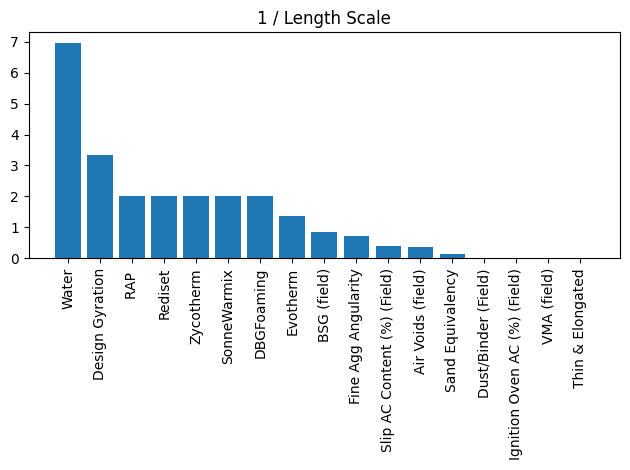

In [97]:
# After fitting GPR model
kernel = model_gpr_rt.named_steps['gpr'].kernel_

# If using a kernel combination like ConstantKernel * RBF + WhiteKernel,
# get the RBF kernel length scales like this:


print("Feature length-scales:", kernel.k1.k2.length_scale)

# Access feature importances
feature_importances = 1 / kernel.k1.k2.length_scale
feature_names = X.columns
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure()
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align="center")
plt.xticks(range(len(feature_importances)), feature_names[sorted_indices],rotation = 90)
plt.title("1 / Length Scale")
plt.tight_layout()
plt.show()
plt.show()

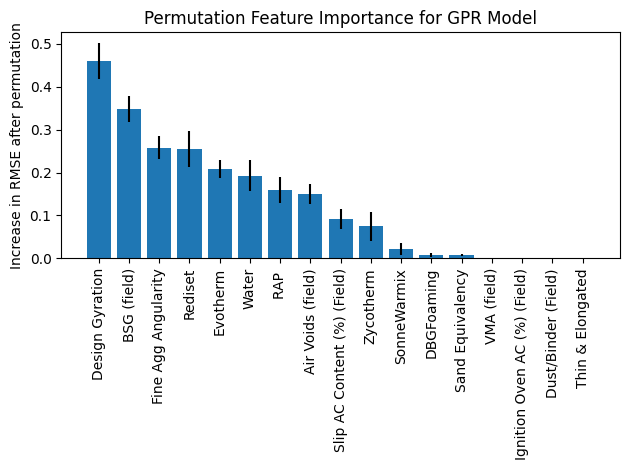

In [98]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    model_gpr_rt, X_clean, y_clean,
    n_repeats=10, random_state=42, scoring='neg_root_mean_squared_error', n_jobs=-1
)

# Extract importance scores and feature names
importance_means = result.importances_mean
importance_std = result.importances_std
feature_names = X_clean.columns if hasattr(X_clean, 'columns') else [f'Feature {i}' for i in range(X_clean.shape[1])]

# Sort features by importance (descending)
sorted_idx = np.argsort(importance_means)[::-1]

plt.figure()
plt.bar(range(len(feature_names)), importance_means[sorted_idx], yerr=importance_std[sorted_idx], align='center')
plt.xticks(range(len(feature_names)), np.array(feature_names)[sorted_idx], rotation=90)
plt.ylabel('Increase in RMSE after permutation')
plt.title('Permutation Feature Importance for GPR Model')
plt.tight_layout()
plt.show()